In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [5]:
X,y_true=make_blobs(n_samples=300,centers=3,cluster_std=0.50,random_state=0)

['r', 'g', 'b']


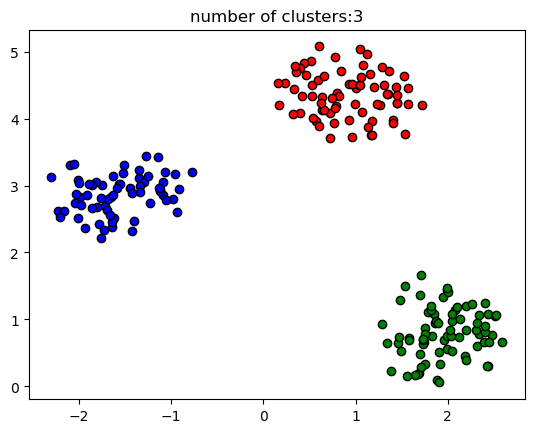

In [14]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_]=True
labels=db.labels_
n_clusters_=len(set(labels)) - (1 if -1 in labels else 0)
unique_labels=set(labels)
colors=['r','g','b']
print(colors)
for k,col in zip(unique_labels,colors):
    if k==-1:
        col='k'
    class_member_mask=(labels==k)
    xy=X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=col,markeredgecolor='k',markersize=6)
    xy=X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=col,markeredgecolor='k',markersize=6)
           
plt.title('number of clusters:%d'%n_clusters_)
plt.show()

In [19]:
sc=metrics.silhouette_score(X,labels)
print("silhoutte coefficient:%0.2f" % sc)
ari=metrics.adjusted_rand_score(y_true,labels
                               )
print("adjusted rand index:%0.2f"%ari)

silhoutte coefficient:0.37
adjusted rand index:0.54
